In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [13]:
df = pd.read_csv('Hot.csv')
df = convert_time_to_seconds(df, 'Time')
df.head()

,Time,Voltage_0 (Collected),Voltage_1 (Collected),Temperature_0 (Collected)
0,0.000,0.726357,2.359182,21.961545
1,0.001,0.729863,2.360447,21.961545
2,0.002,0.738469,2.364557,21.961545
3,0.003,0.740063,2.365506,21.961545
4,0.004,0.726357,2.360130,21.961545


In [14]:
# calibrate IC Sensor
calibration_df = df[(df['Time'] >= 2) & (df['Time'] <= 10)]
ic_coeff = get_IC_coefficents(calibration_df)

ic_coeff_h2a = [ 23.13923163, -31.00751685]
print('ic_coeff:', ic_coeff)

df['Temperature_2 (IC Sensor)'] = get_IC_temperatures(df, ic_coeff_h2a)

ic_coeff: [ 28.61001534 -50.26829149]


In [15]:
# Calibrate Thermistor
calibration_df = df[(df['Temperature_0 (Collected)'] >= 20) & (df['Temperature_0 (Collected)'] <= 60)]
coeff1 = get_steinhart_hart_coefficents(calibration_df)
coeff1 = [ 0.0262222,  -0.08212696,  0.09546998] # from h2a
print('Thermistor Coefficents',coeff1)
df['Temperature_1 (Thermistor)'] = get_thermistor_temperatures(df,coeff1)

Thermistor Coefficents [0.0262222, -0.08212696, 0.09546998]


Text(0.5, 1.0, 'Ambient to Hot Temperature Measurements')

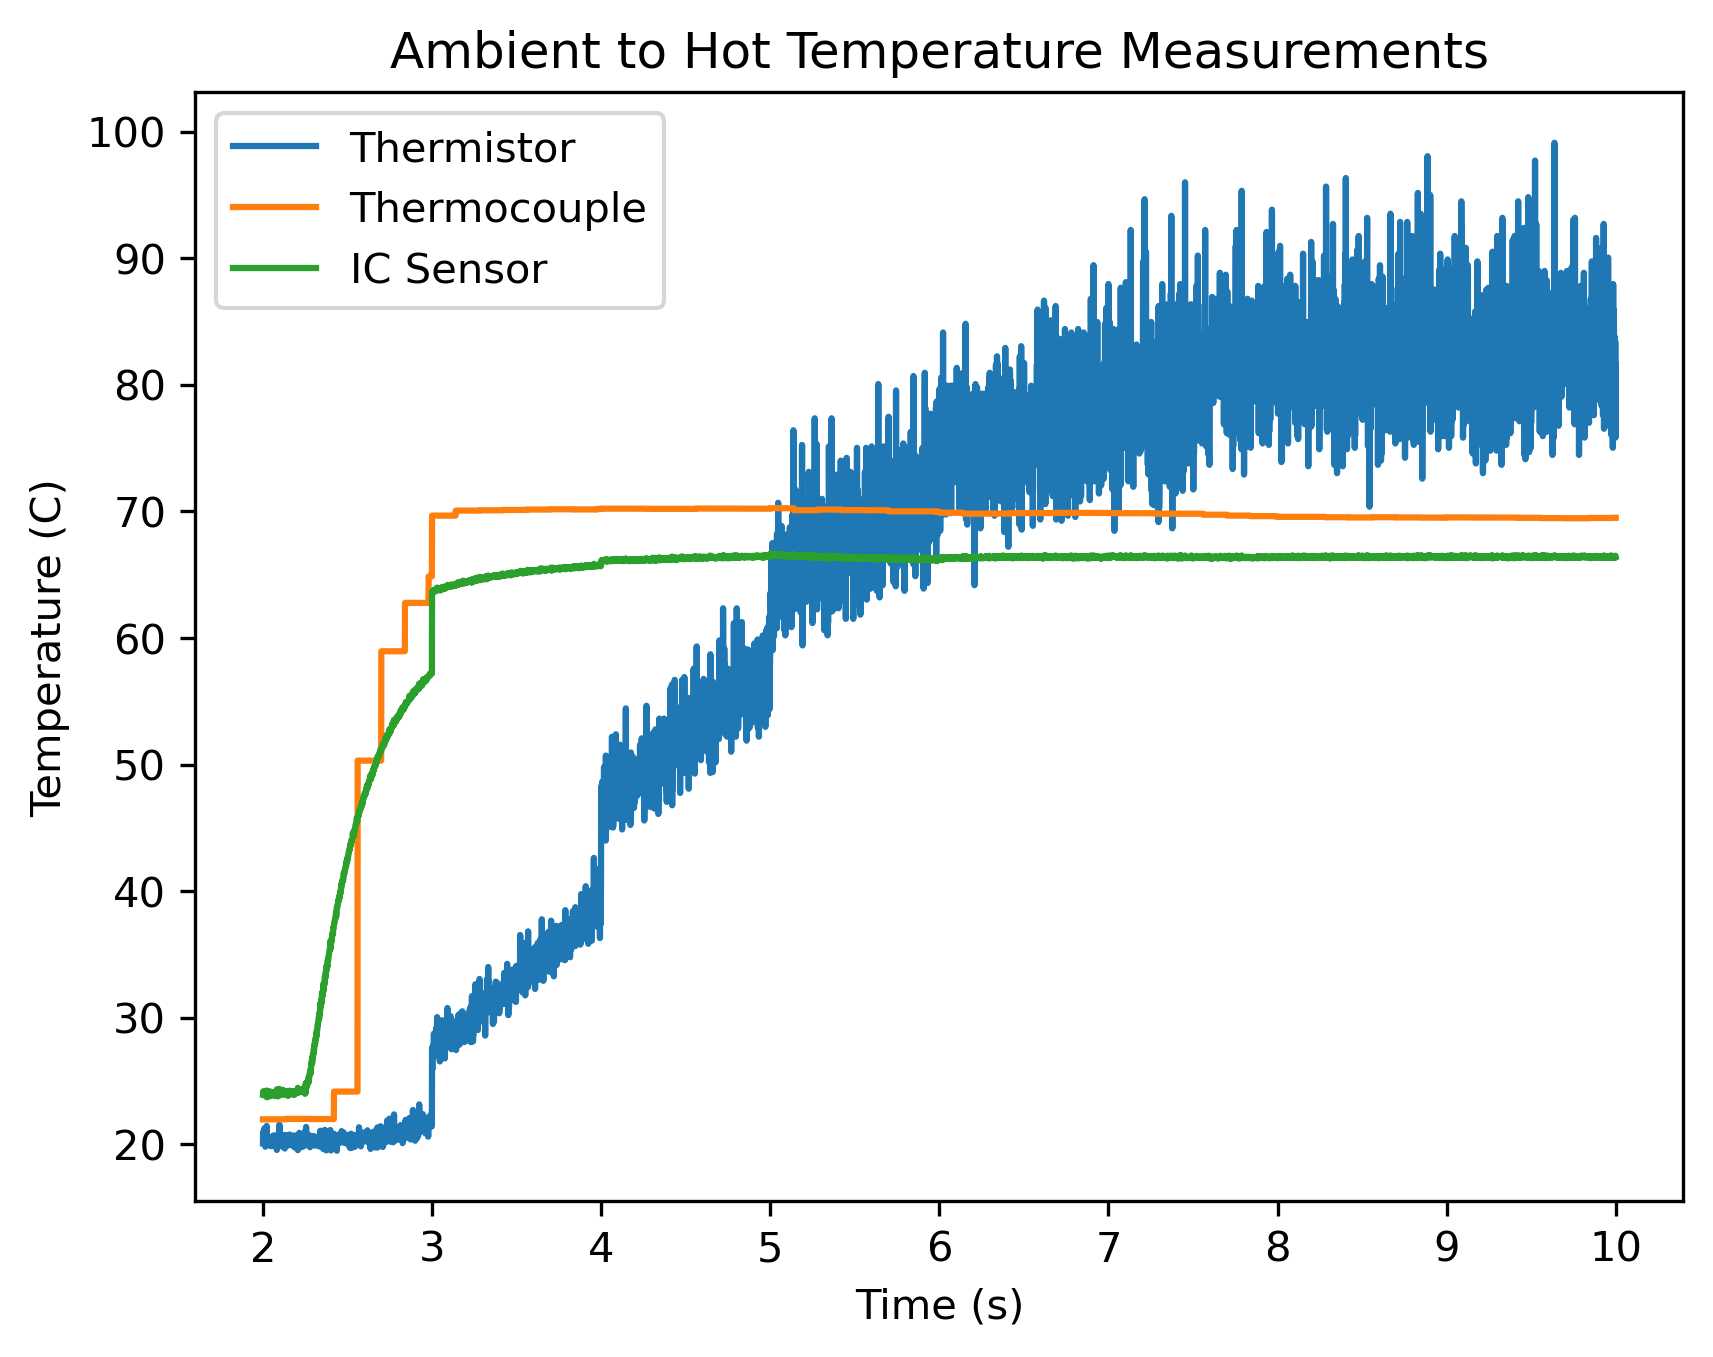

In [20]:
a2h_df = df[(df['Time'] >= 2) & (df['Time'] <= 10)]

plt.plot(a2h_df['Time'],a2h_df['Temperature_1 (Thermistor)'], label = 'Thermistor')
plt.plot(a2h_df['Time'],a2h_df['Temperature_0 (Collected)'], label = 'Thermocouple')
plt.plot(a2h_df['Time'],a2h_df['Temperature_2 (IC Sensor)'], label = 'IC Sensor')

plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.title('Ambient to Hot Temperature Measurements')

The time constant is: 0.2946


/Users/williamzhang/Documents/College/0 - EMECH/utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_column] = df[time_column] - min_time


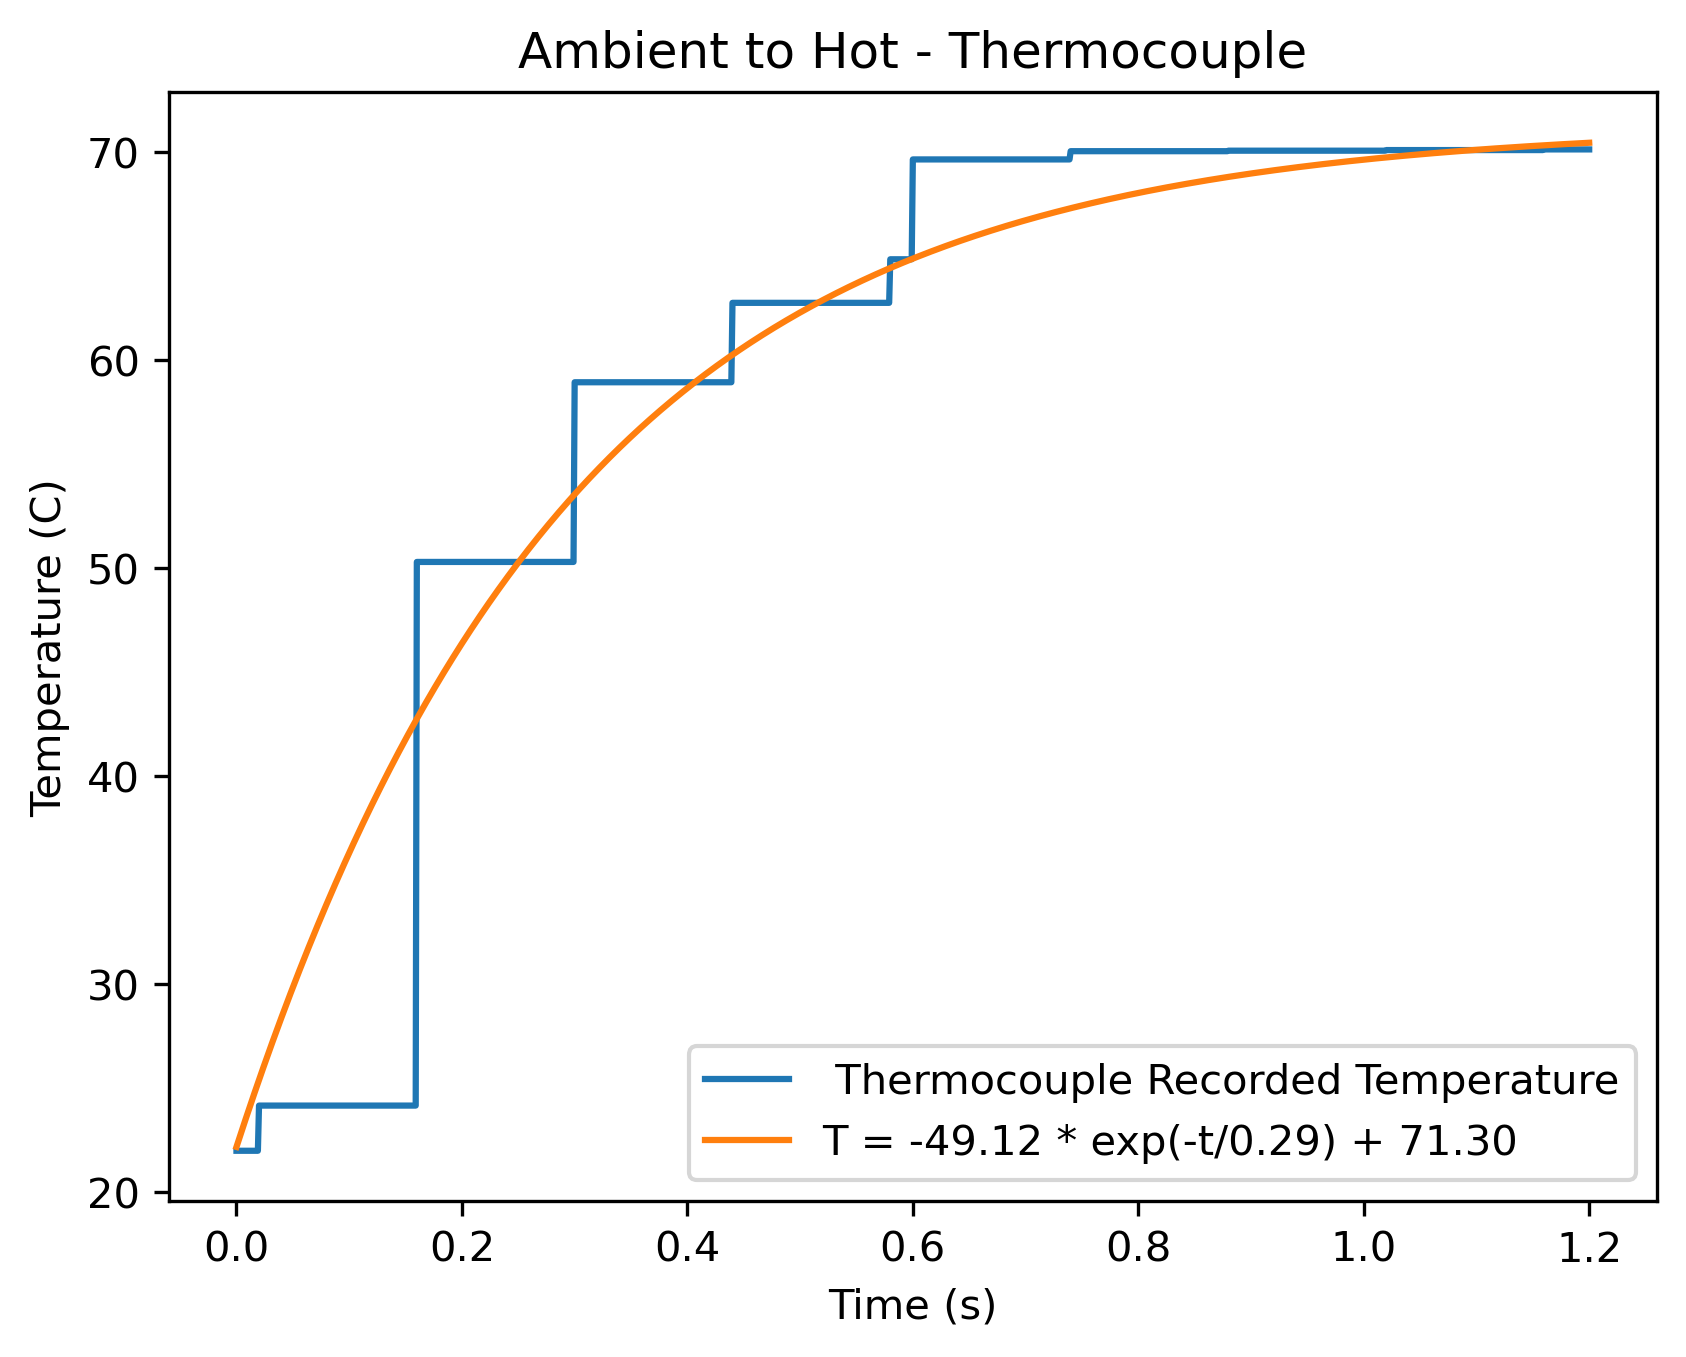

In [17]:
# Calculate Time Constants
# Thermocouple Time Constant
time = 'Time'
temp = 'Temperature_0 (Collected)'
sensor_type = 'Thermocouple'

plot_df = df[(df['Time'] >= 2.4) & (df['Time'] <= 3.6)]
reset_time(plot_df, time)

a = -49.1238
b = 71.3
tau = get_just_time_constant(plot_df, time, temp, a,b , tau_initial_guess=1)
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(plot_df[time],plot_df[temp], label = f' {sensor_type} Recorded Temperature')
plt.plot(plot_df[time], [exponential_equation(t, a, tau,b ) for t in plot_df[time]], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title(f'Ambient to Hot - {sensor_type}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()

The time constant is: 1.9340


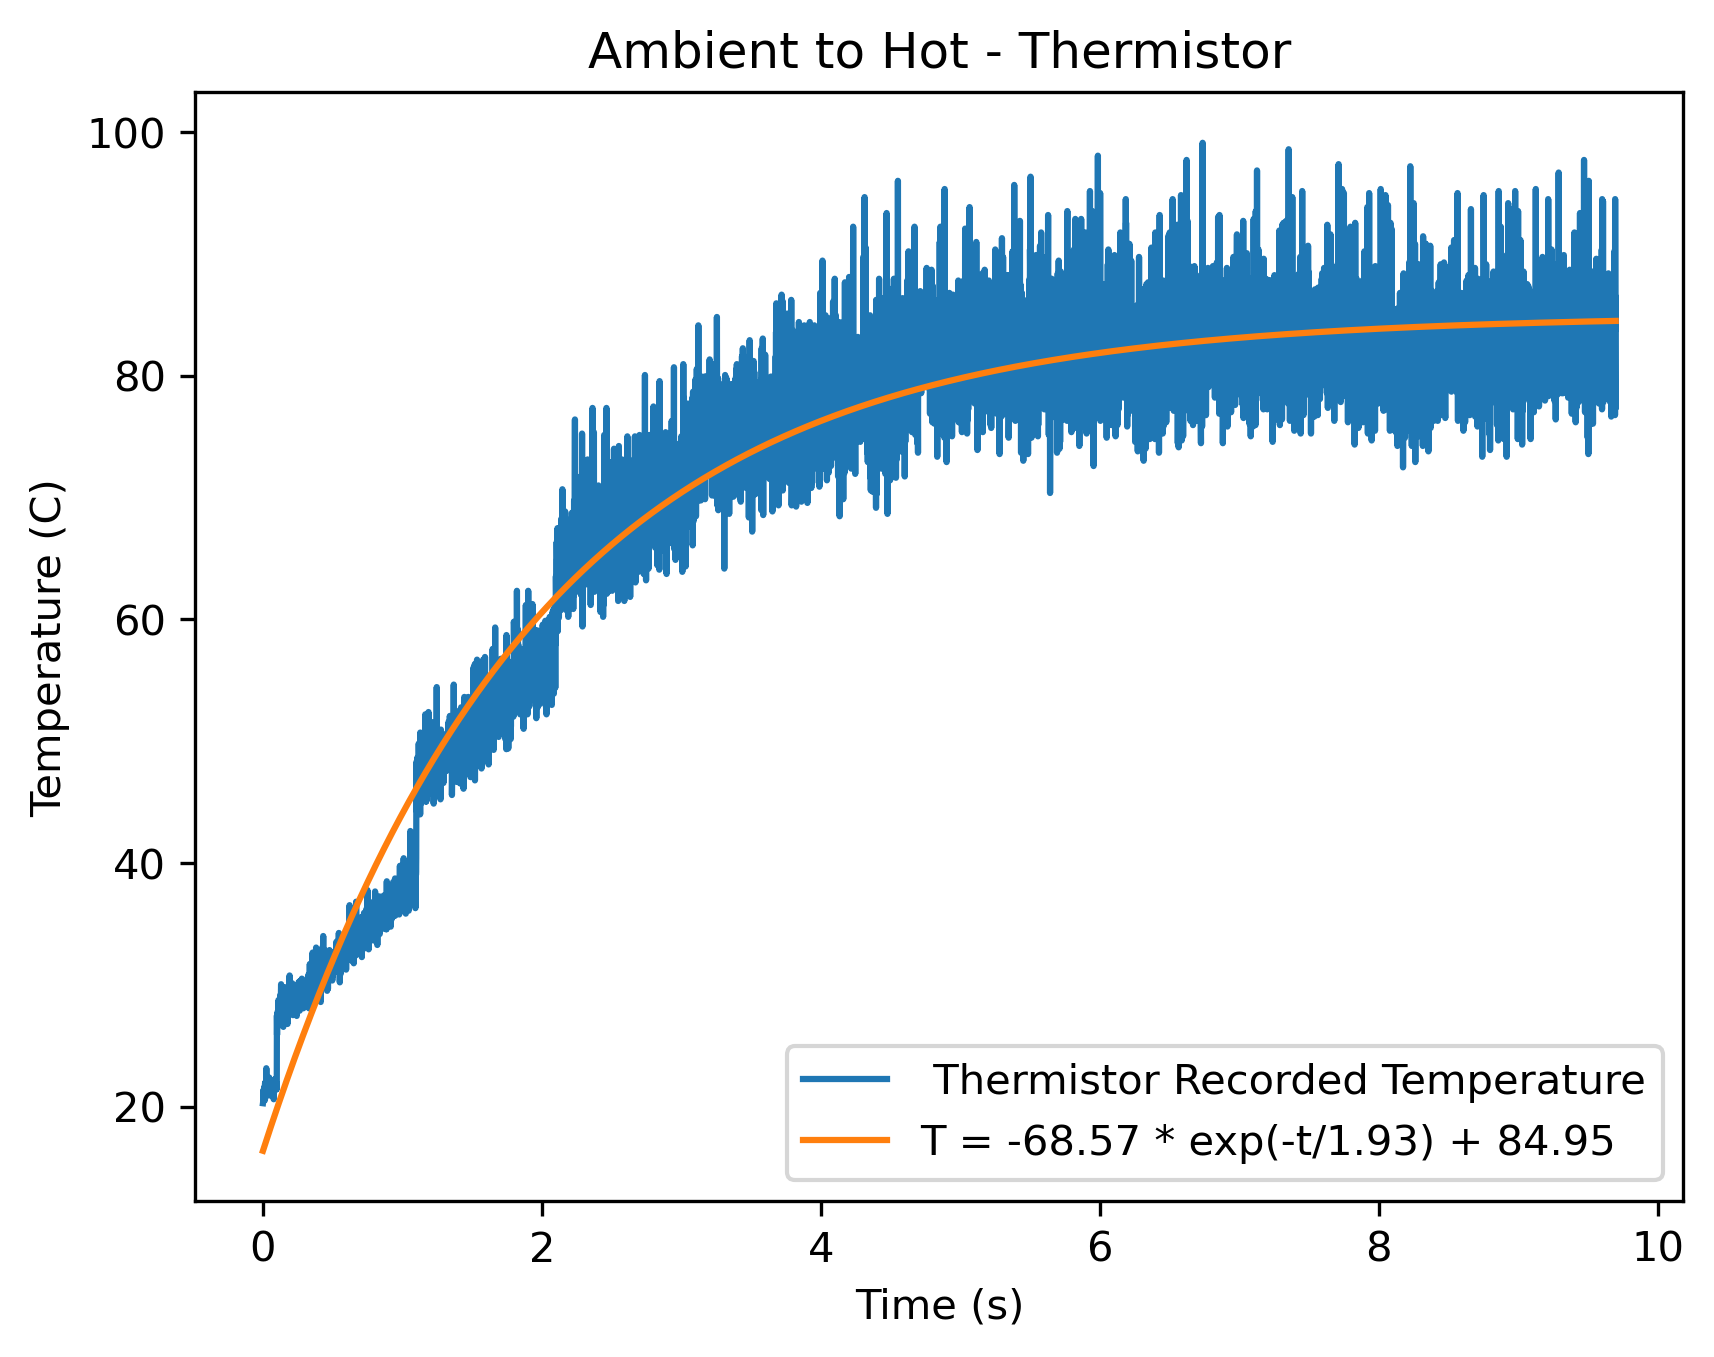

In [18]:
# Calculate Time Constants
# Thermistor Time Constant
time = 'Time'
temp = 'Temperature_1 (Thermistor)'
sensor_type = 'Thermistor'

plot_df = df[(df['Time'] >= 2.9) & (df['Time'] <= 12.6)]
reset_time(plot_df, time)

a,tau,b = get_expoential_coefficents(plot_df, time, temp, initial_guess=[-50,1,70])
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(plot_df[time],plot_df[temp], label = f' {sensor_type} Recorded Temperature')
plt.plot(plot_df[time], [exponential_equation(t, a, tau,b ) for t in plot_df[time]], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title(f'Ambient to Hot - {sensor_type}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()

The time constant is: 0.1383


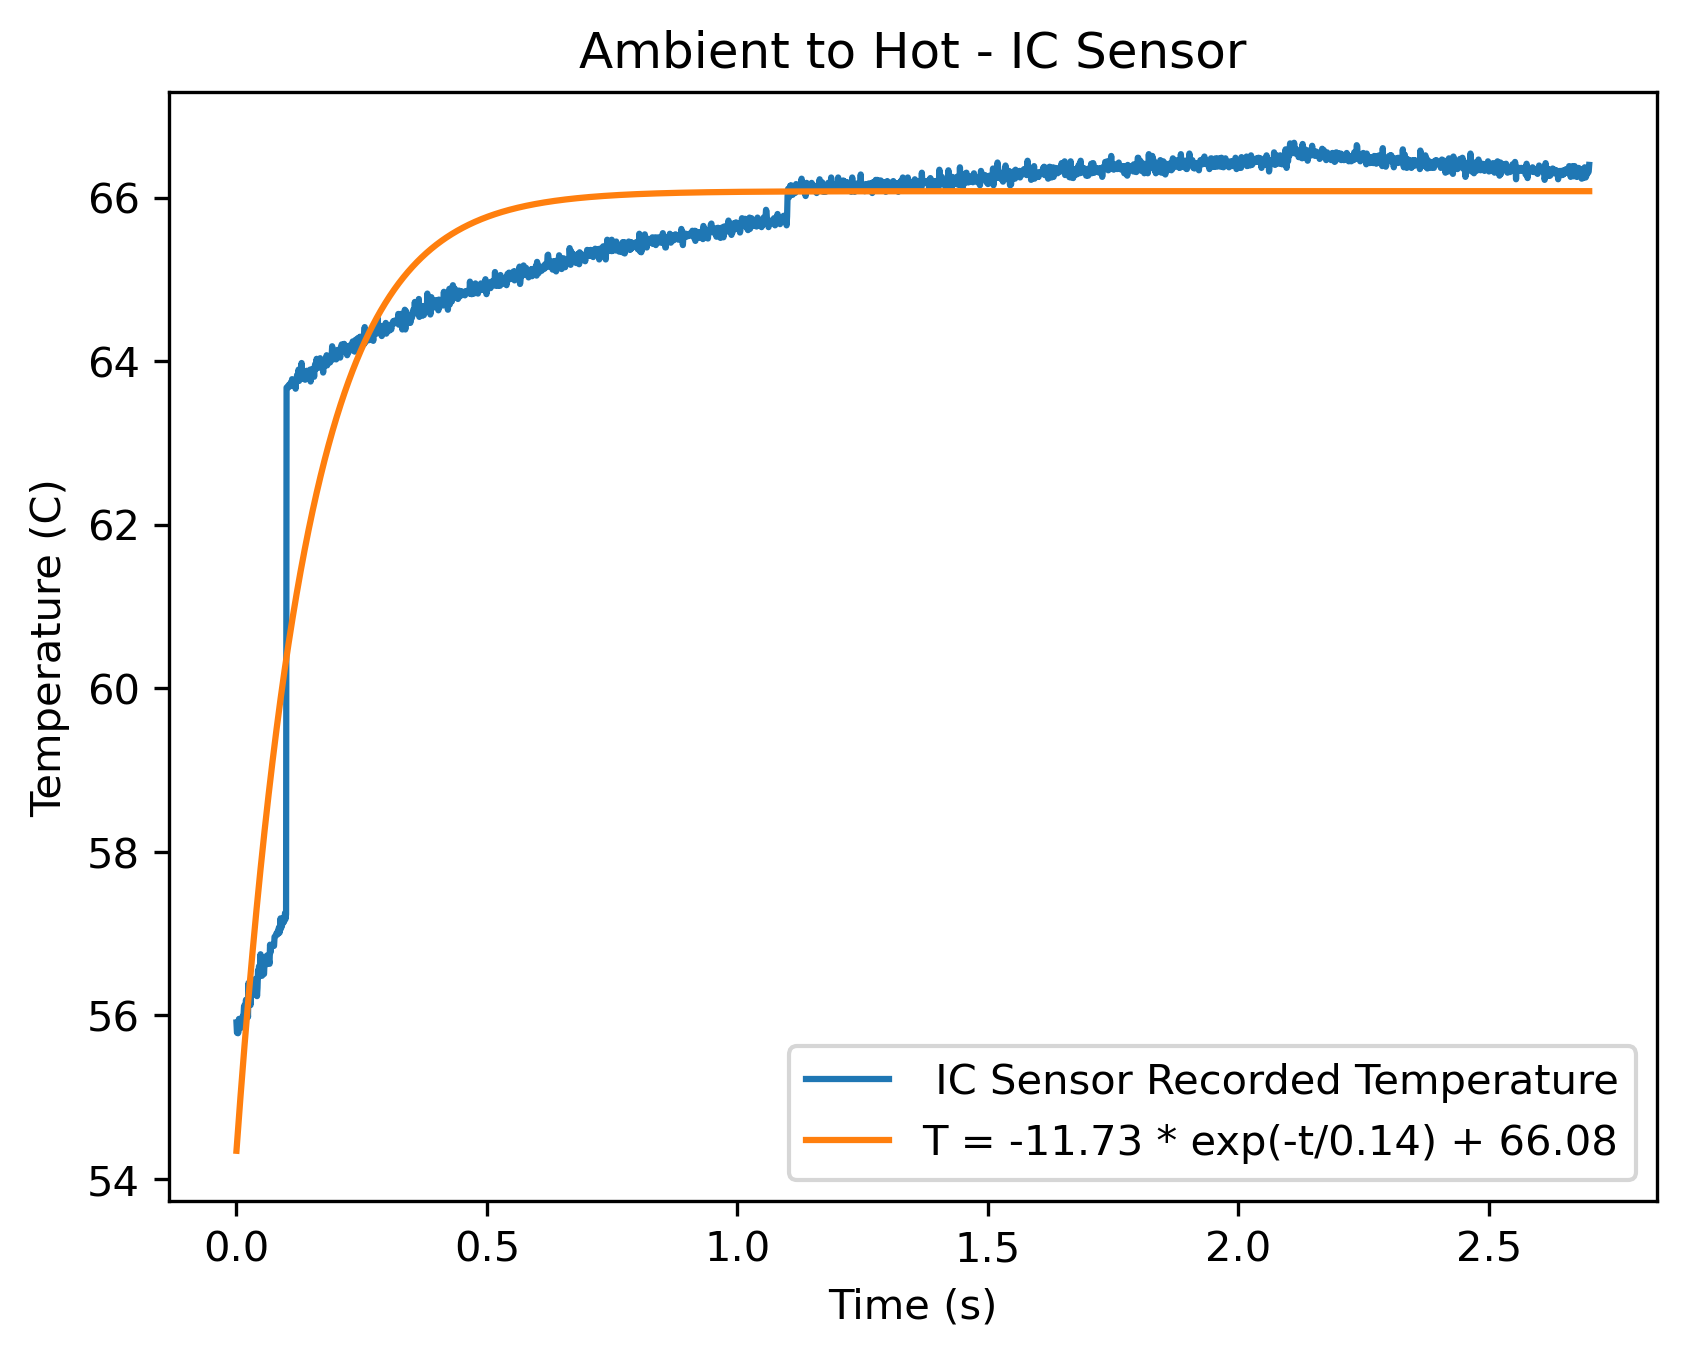

In [19]:
# Calculate Time Constants
# Thermistor Time Constant
time = 'Time'
temp = 'Temperature_2 (IC Sensor)'
sensor_type = 'IC Sensor'

plot_df = df[(df['Time'] >= 2.9) & (df['Time'] <= 5.6)]
reset_time(plot_df, time)

a,tau,b = get_expoential_coefficents(plot_df, time, temp, initial_guess=[-50,1,70])
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(plot_df[time],plot_df[temp], label = f' {sensor_type} Recorded Temperature')
plt.plot(plot_df[time], [exponential_equation(t, a, tau,b ) for t in plot_df[time]], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title(f'Ambient to Hot - {sensor_type}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()